# PowerGAMA
## Europe 2014 model example
This is an example of PowerGAMA using the openly available 2014 Europe dataset by Rye et al., available from
http://dx.doi.org/10.5281/zenodo.54580. This dataset is also included with the source code in the "examples" folder

### Part 1: Data input and simulation


In [34]:
# The next line is to ensure inline plots in this notebook
%matplotlib inline

import powergama
print("PowerGAMA version = {}, ({})".format(powergama.__version__,powergama.__version_date__))
import powergama.plots as pgp
from IPython.core.display import display, HTML


PowerGAMA version = 1.1.1, (2017-09-18)


Define some parameters:
* timerange = range to include in present simulation (refering to rows in the time-series input files) to include in the . In this case, a short range of 24 hours is used
* datapath = path to input files
* sqlfile = name of sqlite3 file storing all results

In [2]:
timerange = range(0,24)
datapath= "data_europe2014/"
sqlfile = "results_db_europe2014.sqlite3"

In [3]:
data = powergama.GridData()
data.readGridData(nodes=datapath +  "2014_nodes.csv",
                  ac_branches=datapath +  "2014_branches.csv",
                  dc_branches=datapath +  "2014_hvdc.csv",
                  generators=datapath + "2014_generators.csv",
                  consumers=datapath + "2014_consumers.csv")
data.readProfileData(filename=datapath+"profiles.csv",
            storagevalue_filling=datapath+"profiles_storval_filling.csv",
            storagevalue_time=datapath+"profiles_storval_time.csv",
            timerange=timerange, 
            timedelta=1.0)

Now, solve the problem
This may take some time.

In [5]:
lp = powergama.LpProblem(data)
res = powergama.Results(data,sqlfile,replace=True)
lp.solve(res)

Computing B and DA matrices...
Creating B and DA coefficients...
Found synchronous area (size = 1530), using ref node = Gradacac
Found synchronous area (size = 2), using ref node = DK-Zealand
Found synchronous area (size = 1), using ref node = GB-Sellindge
Found synchronous area (size = 1), using ref node = GB-Isle of Grain
Found synchronous area (size = 1), using ref node = NO-Kristiansand
Found synchronous area (size = 1), using ref node = NO-Feda
Found synchronous area (size = 1), using ref node = SE-Lindome
Found synchronous area (size = 1), using ref node = SE-Kruseberg
Found synchronous area (size = 1), using ref node = SE-Starno
Creating LP problem instance...
Initialising LP problem...
Replacing existing SQLite file "C:\Users\hsven\code\powergama\powergama\examples\results_db_europe2014.sqlite3"
:) Found solver here: c:\users\hsven\bin\cbc.exe
Solving...
4% 8% 12% 16% 20% 25% 29% 33% 37% 41% 45% 50% 54% 58% 62% 66% 70% 75% 79% 83% 87% 91% 95% 100% 

### Part 2: Analyse results
Plot some results
These plots are examples, more plots and methods to analyse results are available

Getting energy output from all generators...


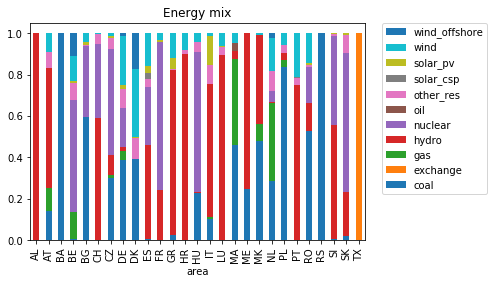

type,coal,exchange,gas,hydro,nuclear,oil,other_res,solar_csp,solar_pv,wind,wind_offshore
area,,,,,,,,,,,
AL,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AT,0.141873,NaN,0.109333,0.578944,NaN,0.000000,0.078600,NaN,0.002055,0.089196,NaN
BA,1.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BE,0.003969,NaN,0.134160,0.000000,0.541775,0.000000,0.080848,NaN,0.009447,0.120211,0.109590
BG,0.593142,NaN,0.000000,0.000000,0.345819,0.000000,0.006280,NaN,0.013403,0.041357,NaN
CH,NaN,NaN,0.000000,0.591926,0.356471,NaN,0.046635,NaN,0.002840,0.002128,NaN
CZ,0.302567,NaN,0.014470,0.095727,0.510742,NaN,0.054310,NaN,0.010714,0.011470,NaN
DE,0.390086,NaN,0.040418,0.022334,0.188251,0.000000,0.087759,NaN,0.021274,0.238027,0.011851
DK,0.393463,NaN,0.000000,0.000137,NaN,0.000000,0.100758,NaN,0.002695,0.332530,0.170417


In [6]:
res.plotEnergyMix(relative=True)

C:\ProgramData\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
C:\ProgramData\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


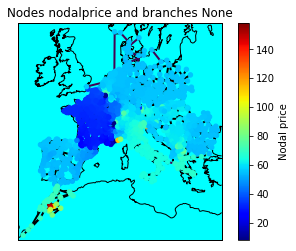

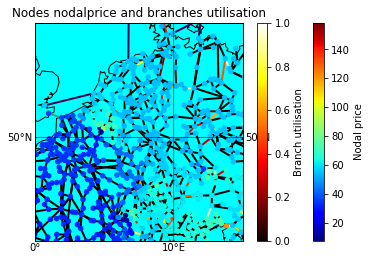

In [10]:
res.plotMapGrid(nodetype='nodalprice',dotsize=20)
res.plotMapGrid(nodetype='nodalprice',branchtype='utilisation',dotsize=20,latlon=[45,0,55,15],draw_par_mer=True)

In [36]:
m=pgp.plotMap(data,res,nodetype="nodalprice",branchtype="utilisation")

#display map using html iframe:
srcdoc = m.get_root().render().replace('"', '&quot;')
embed = HTML('<iframe srcdoc="{}" style="height: {}px; display:block; width:100%; border:0"></iframe>'.format(
    srcdoc, 500))
embed

Nodes...
AC branches...
DC branches...
Consumers...
Generators...


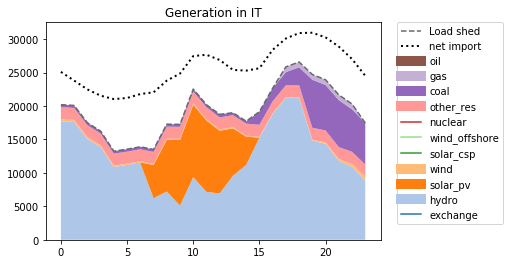

In [8]:
res.plotGenerationPerArea(area='IT')

Generator with storage:

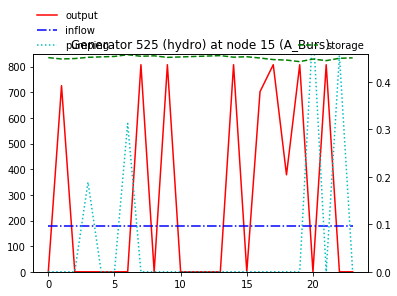

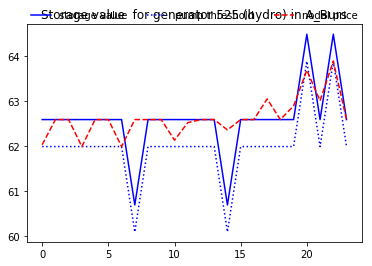

In [9]:
the_generator = 525
res.plotGeneratorOutput(the_generator)
res.plotStorageValues(the_generator)

In [16]:
#res.plotTimeseriesColour(areas=['DE','FR','IT'],value='nodalprice')